 # DATA AUGMENTATION

In [1]:
 # Common imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # TensorFlow imports
# may differs from version to versions

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
image_folder = os.path.join('datasets', 'face_dataset_train_images')
img_height, img_width = 250, 250  # size of images
num_classes = 3

In [4]:
dataset = keras.preprocessing.image_dataset_from_directory(
    image_folder,
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=True)


Found 189 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Cristiano Ronaldo', 'Dwayne Johnson', 'Michael B Jordan']

In [6]:
 # Helper function to get classname of the image
def get_classname(class_names, mask):
    '''
    Returns an element of the array 'class_names' with the index
    where the maximum value from the 'mask' array is located.
    Used to get classname with categorical labels.

    Parameters:
        class_names (array-like): Target array
        mask (array-like): Mask array, elements must be numbers
    Returns:
        One of the element from 'class_names'

    >>> get_classname(['first', 'second'], [0, 1])
    'second'
    >>> get_classname(['first', 'second', third], [1, 0, 0])
    'first'
    '''

    assert len(class_names) == len(
        mask), "The arrays must be of the same length"

    return class_names[np.array(mask).argmax(axis=0)]

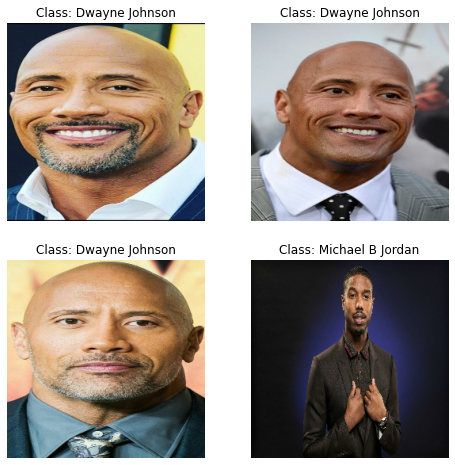

In [7]:
sqrt_img = 2  # images per row / col.
# The square root of the total number of images shown

plt.figure(figsize=(8, 8))
for images, labels in dataset.take(3):
    for index in range(sqrt_img**2):
        # grid 'sqrt_img' x 'sqrt_img'
        plt.subplot(sqrt_img, sqrt_img, index + 1)
        plt.imshow(images[index] / 255)
        class_name = get_classname(class_names, labels[index])
        plt.title("Class: {}".format(class_name))
        plt.axis("off")

In [8]:
 batch_size = 16

In [9]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    image_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 189 images belonging to 3 classes.


(-0.5, 249.5, 249.5, -0.5)

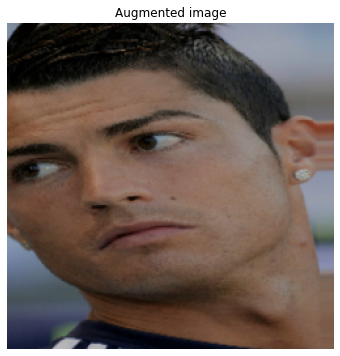

In [10]:
 # To see next augmented image
image, label = train_generator.next()

plt.figure(figsize=(6, 6))
plt.imshow(image[0] / 255)  # first image from batch
plt.title("Augmented image")
plt.axis("off")

In [11]:
n = 5

aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

In [ ]:
image_folder_to_generate = os.path.join(image_folder, 'Cristiano Ronaldo')
image_folder_to_save = os.path.join(aug_image_folder, 'Cristiano Ronaldo')

if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save)  # create folder if doesn't exist

i = 0
total = len(os.listdir(image_folder_to_generate))  # number of files in folder
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    # for each image in folder: read it
    image_path = os.path.join(image_folder_to_generate, filename)
    image = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width, 3))
    image = keras.preprocessing.image.img_to_array(
        image)  # from image to array
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    image = np.expand_dims(image, axis=0)

    # create ImageDataGenerator object for it
    current_image_gen = train_datagen.flow(image,
                                           batch_size=1,
                                           save_to_dir=image_folder_to_save,
                                           save_prefix=filename,
                                           save_format="jpg")

    # generate n samples
    count = 0
    for image in current_image_gen:  # accessing the object saves the image to disk
        count += 1
        if count == n:  # n images were generated
            break
    print('\tGenerate {} samples for file {}'.format(n, filename))
    i += 1

print("\nTotal number images generated = {}".format(n*total))

In [ ]:
image_folder_to_generate = os.path.join(image_folder, 'Michael B Jordan')
image_folder_to_save = os.path.join(aug_image_folder, 'Michael B Jordan')

if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save)  # create folder if doesn't exist

i = 0
total = len(os.listdir(image_folder_to_generate))  # number of files in folder
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    # for each image in folder: read it
    image_path = os.path.join(image_folder_to_generate, filename)
    image = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width, 3))
    image = keras.preprocessing.image.img_to_array(
        image)  # from image to array
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    image = np.expand_dims(image, axis=0)

    # create ImageDataGenerator object for it
    current_image_gen = train_datagen.flow(image,
                                           batch_size=1,
                                           save_to_dir=image_folder_to_save,
                                           save_prefix=filename,
                                           save_format="jpg")

    # generate n samples
    count = 0
    for image in current_image_gen:  # accessing the object saves the image to disk
        count += 1
        if count == n:  # n images were generated
            break
    print('\tGenerate {} samples for file {}'.format(n, filename))
    i += 1

print("\nTotal number images generated = {}".format(n*total))

In [ ]:
image_folder_to_generate = os.path.join(image_folder, 'Dwayne Johnson')
image_folder_to_save = os.path.join(aug_image_folder, 'Dwayne Johnson')

if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save)  # create folder if doesn't exist

i = 0
total = len(os.listdir(image_folder_to_generate))  # number of files in folder
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    # for each image in folder: read it
    image_path = os.path.join(image_folder_to_generate, filename)
    image = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width, 3))
    image = keras.preprocessing.image.img_to_array(
        image)  # from image to array
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    image = np.expand_dims(image, axis=0)

    # create ImageDataGenerator object for it
    current_image_gen = train_datagen.flow(image,
                                           batch_size=1,
                                           save_to_dir=image_folder_to_save,
                                           save_prefix=filename,
                                           save_format="jpg")

    # generate n samples
    count = 0
    for image in current_image_gen:  # accessing the object saves the image to disk
        count += 1
        if count == n:  # n images were generated
            break
    print('\tGenerate {} samples for file {}'.format(n, filename))
    i += 1

print("\nTotal number images generated = {}".format(n*total))

# Real time detection cv2

#  TRAIN THE MODEL (resnet 50)

In [13]:
import os
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing import image

In [15]:

# Test dataset is set explicitly, because the amount of data is very small
train_aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
train_image_folder = os.path.join('datasets', 'face_dataset_train_images')
test_image_folder = os.path.join('datasets', 'face_dataset_test_images')
img_height, img_width = 250, 250  # size of images
num_classes = 3  # 
# Training settings

validation_ratio = 0.15  # 15% for the validation
batch_size = 16

AUTOTUNE = tf.data.AUTOTUNE

In [16]:
 # Train and validation sets of initial dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_image_folder,
    validation_split=validation_ratio,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

val_ds = keras.preprocessing.image_dataset_from_directory(
    train_image_folder,
    validation_split=validation_ratio,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True)

Found 189 files belonging to 3 classes.
Using 161 files for training.
Found 189 files belonging to 3 classes.
Using 28 files for validation.


In [17]:
train_aug_ds = keras.preprocessing.image_dataset_from_directory(
    train_aug_image_folder,
    validation_split=validation_ratio,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

val_aug_ds = keras.preprocessing.image_dataset_from_directory(
    train_aug_image_folder,
    validation_split=validation_ratio,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True)

Found 945 files belonging to 3 classes.
Using 804 files for training.
Found 945 files belonging to 3 classes.
Using 141 files for validation.


In [18]:
 test_ds = keras.preprocessing.image_dataset_from_directory(
    test_image_folder,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=False)

Found 97 files belonging to 3 classes.


In [19]:
class_names = test_ds.class_names
class_names


['Cristiano Ronaldo', 'Dwayne Johnson', 'Michael B Jordan']

In [20]:
base_model = keras.applications.ResNet50(weights='imagenet',
                                         include_top=False,  
                                         input_shape=(img_height, img_width, 3))


for layer in base_model.layers:
    layer.trainable = False

global_avg_pooling = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(num_classes, activation='softmax')(global_avg_pooling)

ResNet50 = keras.models.Model(inputs=base_model.input,
                              outputs=output,
                              name='ResNet50')
ResNet50.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 63, 63, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 63, 63, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 63, 63, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 63, 63, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [26]:
face_classifier = ResNet50
face_classifier.summary()  # to check that model is choosen correctly

train_on_aug = False  # train on augmented dataset

if train_on_aug:
    train_ds = train_aug_ds
    val_ds = val_aug_ds

if train_on_aug:
    name_to_save = f"models/face_classifier_{face_classifier.name}_aug.h5"
else:
    name_to_save = f"models/face_classifier_{face_classifier.name}.h5"

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 63, 63, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 63, 63, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 63, 63, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 63, 63, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [27]:
checkpoint = ModelCheckpoint(name_to_save,
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=5,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]

In [28]:
face_classifier.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['accuracy'])

In [29]:
epochs = 50


In [30]:
 history = face_classifier.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds)

face_classifier.save(name_to_save)

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 0.0790 - accuracy: 0.9725
Epoch 1: val_loss improved from inf to 0.65800, saving model to models\face_classifier_ResNet50.h5
51/51 [==============================] - 11s 143ms/step - loss: 0.0786 - accuracy: 0.9726 - val_loss: 0.6580 - val_accuracy: 0.8369
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 0.1293 - accuracy: 0.9563
Epoch 2: val_loss improved from 0.65800 to 0.17793, saving model to models\face_classifier_ResNet50.h5
51/51 [==============================] - 6s 120ms/step - loss: 0.1362 - accuracy: 0.9552 - val_loss: 0.1779 - val_accuracy: 0.9504
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9613
Epoch 3: val_loss improved from 0.17793 to 0.15485, saving model to models\face_classifier_ResNet50.h5
51/51 [==============================] - 6s 120ms/step - loss: 0.1406 - accuracy: 0.9614 - val_loss: 0.1548 - val_accuracy: 0.9574
Epoch 4/50
50/51 [=

51/51 [==============================] - 6s 121ms/step - loss: 1.6928e-05 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9787
Epoch 27/50
51/51 [==============================] - ETA: 0s - loss: 1.6244e-05 - accuracy: 1.0000
Epoch 27: val_loss improved from 0.09663 to 0.09557, saving model to models\face_classifier_ResNet50.h5
51/51 [==============================] - 6s 122ms/step - loss: 1.6244e-05 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9787
Epoch 28/50
50/51 [============================>.] - ETA: 0s - loss: 1.5909e-05 - accuracy: 1.0000
Epoch 28: val_loss improved from 0.09557 to 0.09525, saving model to models\face_classifier_ResNet50.h5
51/51 [==============================] - 6s 122ms/step - loss: 1.5839e-05 - accuracy: 1.0000 - val_loss: 0.0953 - val_accuracy: 0.9787
Epoch 29/50
50/51 [============================>.] - ETA: 0s - loss: 1.5170e-05 - accuracy: 1.0000
Epoch 29: val_loss improved from 0.09525 to 0.09471, saving model to models\face_classifie

In [ ]:
model_name = 'face_classifier_ResNet50_aug.h5'
face_classifier = keras.models.load_model(f'models/{model_name}')

In [ ]:
test_path = 'datasets/face_dataset_test_images/Michael B Jordan/854488.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [ ]:
 test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

In [ ]:
test_path = 'datasets/face_dataset_test_images/Dwayne Johnson/2205be8c43712382e54cc3afa5ac28be.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

 

In [ ]:
test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

In [ ]:
test_path = 'datasets/face_dataset_test_images/Cristiano Ronaldo/edf30e7cddd4b706f0ddc2cbc924aad6.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

 

In [ ]:
test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

In [55]:
import numpy as np

# TensorFlow imports
# may differs from version to versions
import tensorflow as tf
from tensorflow import keras

# OpenCV
import cv2

In [56]:
 # Colors to draw rectangles in BGR
RED = (0, 0, 255)
GREEN = (0, 255, 0)

In [57]:
# opencv object that will detect faces for us
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [58]:
# Load model to face classification
# model was created in me_not_me_classifier.ipynb notebook
model_name = 'face_classifier_MobileNet_aug.h5'

face_classifier = keras.models.load_model(f'models/{model_name}')
class_names = ['Cristiano Ronaldo','Dwayne Johnson','Michael B Jordan']

In [59]:
def get_extended_image(img, x, y, w, h, k=0.1):
    '''
    Function, that return cropped image from 'img'
    If k=0 returns image, cropped from (x, y) (top left) to (x+w, y+h) (bottom right)
    If k!=0 returns image, cropped from (x-k*w, y-k*h) to (x+k*w, y+(1+k)*h)
    After getting the desired image resize it to 250x250.
    And converts to tensor with shape (1, 250, 250, 3)

    Parameters:
        img (array-like, 2D): The original image
        x (int): x coordinate of the upper-left corner
        y (int): y coordinate of the upper-left corner
        w (int): Width of the desired image
        h (int): Height of the desired image
        k (float): The coefficient of expansion of the image

    Returns:
        image (tensor with shape (1, 250, 250, 3))
    '''

    # The next code block checks that coordinates will be non-negative
    # (in case if desired image is located in top left corner)
    if x - k*w > 0:
        start_x = int(x - k*w)
    else:
        start_x = x
    if y - k*h > 0:
        start_y = int(y - k*h)
    else:
        start_y = y

    end_x = int(x + (1 + k)*w)
    end_y = int(y + (1 + k)*h)

    face_image = img[start_y:end_y,
                     start_x:end_x]
    face_image = tf.image.resize(face_image, [250, 250])
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    face_image = np.expand_dims(face_image, axis=0)
    return face_image

In [60]:
video_capture = cv2.VideoCapture(0)  # webcamera

if not video_capture.isOpened():
    print("Unable to access the camera")
else:
    print("Access to the camera was successfully obtained")

print("Streaming started - to quit press ESC")
while True:

    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        # for each face on the image detected by OpenCV
        # get extended image of this face
        face_image = get_extended_image(frame, x, y, w, h, 0.5)

        # classify face and draw a rectangle around the face
        # green for positive class and red for negative
        result = face_classifier.predict(face_image)
        prediction = class_names[np.array(
            result[0]).argmax(axis=0)]  # predicted class
        confidence = np.array(result[0]).max(axis=0)  # degree of confidence

        if prediction == 'Cristiano Ronaldo' or prediction =='Dwayne Johnson' or prediction =='Michael B Jordan':
            color = GREEN
        else:
            color = RED
        # draw a rectangle around the face
        cv2.rectangle(frame,
                      (x, y),  # start_point
                      (x+w, y+h),  # end_point
                      color,
                      2)  # thickness in px
        cv2.putText(frame,
                    # text to put
                    "{:6} - {:.2f}%".format(prediction, confidence*100),
                    (x, y),
                    cv2.FONT_HERSHEY_PLAIN,  # font
                    2,  # fontScale
                    color,
                    2)  # thickness in px

    # display the resulting frame
    cv2.imshow("Face detector - to quit press ESC", frame)

    # Exit with ESC
    key = cv2.waitKey(1)
    if key % 256 == 27:  # ESC code
        break


# when everything done, release the capture
video_capture.release()
cv2.destroyAllWindows()
print("Streaming ended")

Access to the camera was successfully obtained
Streaming started - to quit press ESC
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step
Streaming ended


# SVM and PCA

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

In [3]:
import os
source_dir=os.path.join('datasets/face_dataset_train_images/' )

In [4]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(source_dir)

In [5]:
print('metadata shape :', metadata.shape)

metadata shape : (185,)


In [6]:
metadata[150]

datasets/face_dataset_train_images/Michael B Jordan\michael-b-jordan-attends-the-2022-vanity-fair-oscar-party-hosted-by-picture-id1388277818.jpg

In [7]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [8]:
load_image('datasets/face_dataset_train_images/Cristiano Ronaldo/wp8147630.jpg')

array([[[ 49,  52,  61],
        [ 49,  52,  61],
        [ 49,  52,  61],
        ...,
        [ 59,  59,  69],
        [ 58,  58,  68],
        [ 57,  57,  67]],

       [[ 49,  52,  61],
        [ 49,  52,  61],
        [ 49,  52,  61],
        ...,
        [ 58,  58,  68],
        [ 57,  57,  67],
        [ 56,  56,  66]],

       [[ 50,  53,  62],
        [ 50,  53,  62],
        [ 50,  53,  62],
        ...,
        [ 57,  57,  67],
        [ 57,  57,  67],
        [ 56,  56,  66]],

       ...,

       [[ 85,  85,  97],
        [ 84,  84,  96],
        [ 86,  86,  98],
        ...,
        [ 74,  77,  86],
        [ 72,  75,  84],
        [ 68,  71,  80]],

       [[ 95,  95, 107],
        [ 92,  92, 104],
        [ 90,  90, 102],
        ...,
        [ 82,  85,  94],
        [ 75,  78,  87],
        [ 66,  69,  78]],

       [[104, 104, 116],
        [100, 100, 112],
        [ 95,  95, 107],
        ...,
        [ 93,  96, 105],
        [ 81,  84,  93],
        [ 67,  70,  79]]

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [10]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

In [11]:
model.layers[0], model.layers[-2]

(<keras.layers.reshaping.zero_padding2d.ZeroPadding2D at 0x24a4ef6e100>,
 <keras.layers.reshaping.flatten.Flatten at 0x24a2c5bb130>)

In [12]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [13]:
type(vgg_face_descriptor)

keras.engine.functional.Functional

In [14]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [15]:
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 4s 4s/step
(2622,)


In [16]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.019077128, numpy.ndarray, numpy.float32)

In [17]:
embedding_vector[2], embedding_vector[98], embedding_vector[-2]

(0.016231045, 0.015155595, 0.0126661025)

In [18]:
total_images = len(metadata)

print('total_images :', total_images)

total_images : 185


In [19]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

1/1 [==============================] - 0s 31ms/step


In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

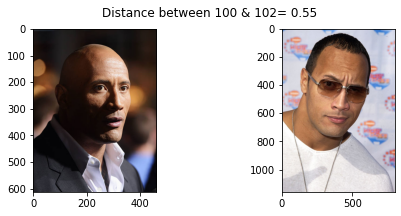

In [21]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(100, 102)


In [22]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0    
test_idx = np.arange(metadata.shape[0]) % 9 == 0

X_train = embeddings[train_idx]
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

In [23]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (164,2622)
y_train shape : (164,)
X_test shape : (21,2622)
y_test shape : (21,)


In [24]:
y_test[0], y_train[117]

('Cristiano Ronaldo', 'Dwayne Johnson')

In [25]:
len(np.unique(y_test)), len(np.unique(y_train))

(3, 3)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [27]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['Cristiano Ronaldo' 'Dwayne Johnson' 'Michael B Jordan']


In [28]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
y_test_encoded :  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2]


In [29]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [30]:
X_test_std = scaler.transform(X_test)

In [31]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (164,2622)
y_train_encoded shape : (164,)
X_test_std shape : (21,2622)
y_test_encoded shape : (21,)


In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=118)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [33]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [34]:
y_predict = clf.predict(X_test_pca)

In [35]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [0 0 0 0 0 0 0 0 1 1 2 1 1 2 1 2 0 2 1 2 2]
y_test_encoded :  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2]


In [36]:
y_predict_encoded = le.inverse_transform(y_predict)

In [37]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['Cristiano Ronaldo' 'Cristiano Ronaldo' 'Cristiano Ronaldo'
 'Cristiano Ronaldo' 'Cristiano Ronaldo' 'Cristiano Ronaldo'
 'Cristiano Ronaldo' 'Cristiano Ronaldo' 'Dwayne Johnson' 'Dwayne Johnson'
 'Michael B Jordan' 'Dwayne Johnson' 'Dwayne Johnson' 'Michael B Jordan'
 'Dwayne Johnson' 'Michael B Jordan' 'Cristiano Ronaldo'
 'Michael B Jordan' 'Dwayne Johnson' 'Michael B Jordan' 'Michael B Jordan']


In [38]:
accuracy_score(y_test_encoded, y_predict)

0.8095238095238095

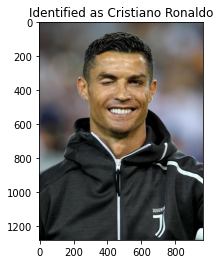

In [39]:
example_idx =3

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

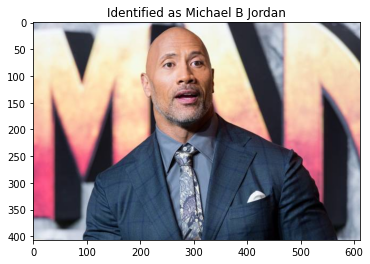

In [43]:
example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

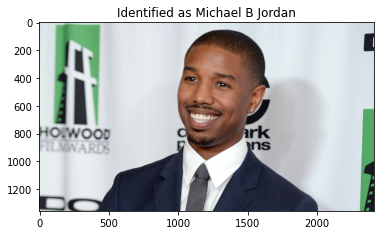

In [41]:
example_idx = 20
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

<AxesSubplot: >

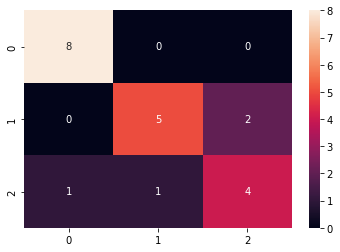

In [111]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test_encoded, y_predict, labels=range(num_classes))

sns.heatmap(cm,annot=True)

In [106]:
print(classification_report(y_test_encoded, y_predict,target_names=np.unique(y_predict_encoded)))

                   precision    recall  f1-score   support

Cristiano Ronaldo       0.89      1.00      0.94         8
   Dwayne Johnson       0.83      0.71      0.77         7
 Michael B Jordan       0.67      0.67      0.67         6

         accuracy                           0.81        21
        macro avg       0.80      0.79      0.79        21
     weighted avg       0.81      0.81      0.81        21



# VGG16


In [15]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
train_aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
train_image_folder = os.path.join('datasets', 'face_dataset_train_images')
test_image_folder = os.path.join('datasets', 'face_dataset_test_images')
img_height, img_width = 250, 250  # size of images
num_classes = 3  

# Training settings
validation_ratio = 0.15  # 15% for the validation
batch_size = 16

AUTOTUNE = tf.data.AUTOTUNE

In [17]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_image_folder,
    validation_split=validation_ratio,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

val_ds = keras.preprocessing.image_dataset_from_directory(
    train_image_folder,
    validation_split=validation_ratio,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True)

Found 189 files belonging to 3 classes.
Using 161 files for training.
Found 189 files belonging to 3 classes.
Using 28 files for validation.


In [18]:
train_aug_ds = keras.preprocessing.image_dataset_from_directory(
    train_aug_image_folder,
    validation_split=validation_ratio,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

val_aug_ds = keras.preprocessing.image_dataset_from_directory(
    train_aug_image_folder,
    validation_split=validation_ratio,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True)

Found 945 files belonging to 3 classes.
Using 804 files for training.
Found 945 files belonging to 3 classes.
Using 141 files for validation.


In [19]:
 test_ds = keras.preprocessing.image_dataset_from_directory(
    test_image_folder,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=False)

Found 97 files belonging to 3 classes.


In [37]:
base_model = keras.applications.vgg16.VGG16(weights='imagenet',
                                            include_top=False,  
                                            input_shape=(img_height, img_width, 3))


for layer in base_model.layers:
    layer.trainable = False


flatten = keras.layers.Flatten()(base_model.output)
dense_4096_1 = keras.layers.Dense(4096, activation='relu')(flatten)
dense_4096_2 = keras.layers.Dense(4096, activation='relu')(dense_4096_1)
output = keras.layers.Dense(num_classes, activation='softmax')(dense_4096_2)

VGG16 = keras.models.Model(inputs=base_model.input,
                           outputs=output,
                           name='VGG16')
VGG16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [38]:
face_classifier = VGG16
face_classifier.summary()  # to check that model is choosen correctly

train_on_aug = False  # train on augmented dataset

if train_on_aug:
    train_ds = train_aug_ds
    val_ds = val_aug_ds

if train_on_aug:
    name_to_save = f"models/face_classifier_{face_classifier.name}_aug.h5"
else:
    name_to_save = f"models/face_classifier_{face_classifier.name}.h5"

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [39]:
 # ModelCheckpoint to save model in case of interrupting the learning process
checkpoint = ModelCheckpoint(name_to_save,
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=5,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]

In [40]:
face_classifier.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['accuracy'])

In [41]:
 epochs = 50

In [42]:
history = face_classifier.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds)

face_classifier.save(name_to_save)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1951.0591 - accuracy: 0.4975
Epoch 1: val_loss improved from inf to 18.90884, saving model to models\face_classifier_VGG16.h5
51/51 [==============================] - 27s 422ms/step - loss: 1951.0591 - accuracy: 0.4975 - val_loss: 18.9088 - val_accuracy: 0.5887
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 647.1022 - accuracy: 0.5908
Epoch 2: val_loss improved from 18.90884 to 0.96150, saving model to models\face_classifier_VGG16.h5
51/51 [==============================] - 15s 291ms/step - loss: 647.1022 - accuracy: 0.5908 - val_loss: 0.9615 - val_accuracy: 0.3901
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.2697 - accuracy: 0.5249
Epoch 3: val_loss improved from 0.96150 to 0.83867, saving model to models\face_classifier_VGG16.h5
51/51 [==============================] - 20s 398ms/step - loss: 1.2697 - accuracy: 0.5249 - val_loss: 0.8387 - val_accuracy: 0.5532
Epoch 4/50
51

In [26]:
model_name = 'face_classifier_VGG16_aug.h5'
face_classifier = keras.models.load_model(f'models/{model_name}')

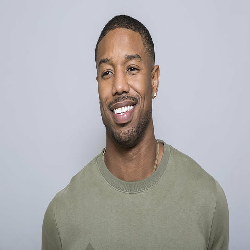

In [27]:
test_path = 'datasets/face_dataset_test_images/Michael B Jordan/actors-michael-b-jordan-actor-american-wallpaper-preview.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [28]:
 test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

1/1 [==============================] - 1s 1s/step
Cristiano Ronaldo with probabily of 30.11%
Dwayne Johnson with probabily of 31.96%
Michael B Jordan with probabily of 37.93%


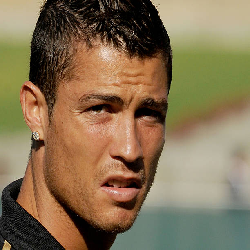

In [33]:
test_path = 'datasets/face_dataset_test_images/Cristiano Ronaldo/cristiano-ronaldo-of-real-madrid-at-the-2011-herbalife-world-football-picture-id139175764.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [34]:
 test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

1/1 [==============================] - 0s 31ms/step
Cristiano Ronaldo with probabily of 100.00%
Dwayne Johnson with probabily of 0.00%
Michael B Jordan with probabily of 0.00%


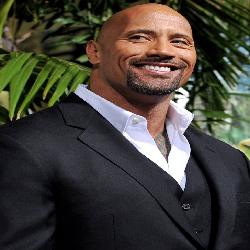

In [31]:
test_path = 'datasets/face_dataset_test_images/Dwayne Johnson/276084bfc8298518fd1975be824b0831.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [32]:
test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

1/1 [==============================] - 0s 23ms/step
Cristiano Ronaldo with probabily of 0.00%
Dwayne Johnson with probabily of 100.00%
Michael B Jordan with probabily of 0.00%


In [35]:
 # Common imports
import numpy as np

# TensorFlow imports
# may differs from version to versions
import tensorflow as tf
from tensorflow import keras

# OpenCV
import cv2

In [36]:
RED = (0, 0, 255)
GREEN = (0, 255, 0)

In [37]:
 # opencv object that will detect faces for us
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:

# model_name = 'face_classifier_VGG16_aug.h5'

# face_classifier = keras.models.load_model(f'models/{model_name}')
class_names = ['Cristiano Ronaldo','Dwayne Johnson','Michael B Jordan']

In [40]:
def get_extended_image(img, x, y, w, h, k=0.1):
    '''
    Function, that return cropped image from 'img'
    If k=0 returns image, cropped from (x, y) (top left) to (x+w, y+h) (bottom right)
    If k!=0 returns image, cropped from (x-k*w, y-k*h) to (x+k*w, y+(1+k)*h)
    After getting the desired image resize it to 250x250.
    And converts to tensor with shape (1, 250, 250, 3)

    Parameters:
        img (array-like, 2D): The original image
        x (int): x coordinate of the upper-left corner
        y (int): y coordinate of the upper-left corner
        w (int): Width of the desired image
        h (int): Height of the desired image
        k (float): The coefficient of expansion of the image

    Returns:
        image (tensor with shape (1, 250, 250, 3))
    '''

    # The next code block checks that coordinates will be non-negative
    # (in case if desired image is located in top left corner)
    if x - k*w > 0:
        start_x = int(x - k*w)
    else:
        start_x = x
    if y - k*h > 0:
        start_y = int(y - k*h)
    else:
        start_y = y

    end_x = int(x + (1 + k)*w)
    end_y = int(y + (1 + k)*h)

    face_image = img[start_y:end_y,
                     start_x:end_x]
    face_image = tf.image.resize(face_image, [250, 250])
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    face_image = np.expand_dims(face_image, axis=0)
    return face_image

In [60]:
video_capture = cv2.VideoCapture(0)  # webcamera

if not video_capture.isOpened():
    print("Unable to access the camera")
else:
    print("Access to the camera was successfully obtained")

print("Streaming started - to quit press ESC")
while True:

    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        # for each face on the image detected by OpenCV
        # get extended image of this face
        face_image = get_extended_image(frame, x, y, w, h, 0.5)

        # classify face and draw a rectangle around the face
        # green for positive class and red for negative
        result = face_classifier.predict(face_image)
        prediction = class_names[np.array(
            result[0]).argmax(axis=0)]  # predicted class
        confidence = np.array(result[0]).max(axis=0)  # degree of confidence

        if prediction == 'Cristiano Ronaldo' or prediction =='Dwayne Johnson' or prediction =='Michael B Jordan':
            color = GREEN
        else:
            color = RED
        # draw a rectangle around the face
        cv2.rectangle(frame,
                      (x, y),  # start_point
                      (x+w, y+h),  # end_point
                      color,
                      2)  # thickness in px
        cv2.putText(frame,
                    # text to put
                    "{:6} - {:.2f}%".format(prediction, confidence*100),
                    (x, y),
                    cv2.FONT_HERSHEY_PLAIN,  # font
                    2,  # fontScale
                    color,
                    2)  # thickness in px

    # display the resulting frame
    cv2.imshow("Face detector - to quit press ESC", frame)

    # Exit with ESC
    key = cv2.waitKey(1)
    if key % 256 == 27:  # ESC code
        break


# when everything done, release the capture
video_capture.release()
cv2.destroyAllWindows()
print("Streaming ended")

Access to the camera was successfully obtained
Streaming started - to quit press ESC
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
Streaming ended


# MobileNet

In [31]:
base_model = keras.applications.MobileNet(weights='imagenet',
                                          include_top=False,  # without dense part of the network
                                          input_shape=(img_height, img_width, 3))

# Set layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of MobileNet
global_avg_pooling = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(num_classes, activation='softmax')(global_avg_pooling)

MobileNet = keras.models.Model(inputs=base_model.input,
                               outputs=output,
                               name='MobileNet')
MobileNet.summary()

Model: "MobileNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 125, 125, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 125, 125, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 125, 125, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 125, 125, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 125, 125, 32)     128       
 ation)                                                  

                                                                 
 conv_pw_8 (Conv2D)          (None, 15, 15, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 15, 15, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 15, 15, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 15, 15, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 15, 15, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 15, 15, 512)       0         
                                                                 
 conv_pw_9

In [32]:
face_classifier = MobileNet
face_classifier.summary()  # to check that model is choosen correctly

train_on_aug = False  # train on augmented dataset

if train_on_aug:
    train_ds = train_aug_ds
    val_ds = val_aug_ds

if train_on_aug:
    name_to_save = f"models/face_classifier_{face_classifier.name}_aug.h5"
else:
    name_to_save = f"models/face_classifier_{face_classifier.name}.h5"

Model: "MobileNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 125, 125, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 125, 125, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 125, 125, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 125, 125, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 125, 125, 32)     128       
 ation)                                                  

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 15, 15, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 15, 15, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 15, 15, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 15, 15, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 15, 15, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 15, 15, 512)       262144    
                                                                 
 conv_pw_9

In [33]:
# ModelCheckpoint to save model in case of interrupting the learning process
checkpoint = ModelCheckpoint(name_to_save,
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=5,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]

In [34]:
 face_classifier.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['accuracy'])

In [35]:
 epochs = 50

In [36]:
 history = face_classifier.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds)

face_classifier.save(name_to_save)

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.8061 - accuracy: 0.5410
Epoch 1: val_loss improved from inf to 0.69060, saving model to models\face_classifier_MobileNet.h5
51/51 [==============================] - 5s 65ms/step - loss: 1.8061 - accuracy: 0.5410 - val_loss: 0.6906 - val_accuracy: 0.7234
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 0.5069 - accuracy: 0.7862
Epoch 2: val_loss improved from 0.69060 to 0.42284, saving model to models\face_classifier_MobileNet.h5
51/51 [==============================] - 2s 48ms/step - loss: 0.5061 - accuracy: 0.7861 - val_loss: 0.4228 - val_accuracy: 0.8511
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.3629 - accuracy: 0.8625
Epoch 3: val_loss did not improve from 0.42284
51/51 [==============================] - 2s 45ms/step - loss: 0.3614 - accuracy: 0.8632 - val_loss: 0.6805 - val_accuracy: 0.7447
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.3701 - 

In [55]:
model_name = 'face_classifier_MobileNet_aug.h5'
face_classifier = keras.models.load_model(f'models/{model_name}')

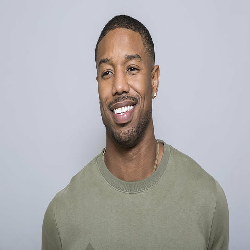

In [49]:
test_path = 'datasets/face_dataset_test_images/Michael B Jordan/actors-michael-b-jordan-actor-american-wallpaper-preview.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [50]:
 test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

1/1 [==============================] - 1s 754ms/step
Cristiano Ronaldo with probabily of 1.94%
Dwayne Johnson with probabily of 0.21%
Michael B Jordan with probabily of 97.85%


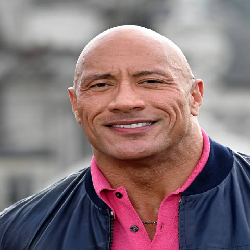

In [51]:
test_path = 'datasets/face_dataset_test_images/Dwayne Johnson/dwayne-johnson-aka-the-rock-attends-the-black-adam-photocall-at-the-picture-id1434130861.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [52]:
test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

1/1 [==============================] - 0s 21ms/step
Cristiano Ronaldo with probabily of 0.00%
Dwayne Johnson with probabily of 100.00%
Michael B Jordan with probabily of 0.00%


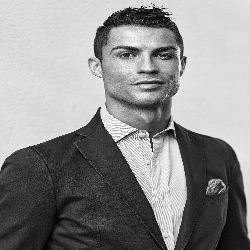

In [53]:
test_path = 'datasets/face_dataset_test_images/Cristiano Ronaldo/3871fcc86df663d9fa85861a8a30871f.jpg'
test_image = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width, 3))
test_image

In [54]:
 test_image = keras.preprocessing.image.img_to_array(test_image)  # from image to array
# shape from (250, 250, 3) to (1, 250, 250, 3)
test_image = np.expand_dims(test_image, axis=0)
result = face_classifier.predict(test_image)

for index in range(num_classes):
    print("{:6} with probabily of {:.2f}%".format(
        class_names[index], result[0][index] * 100))

1/1 [==============================] - 0s 25ms/step
Cristiano Ronaldo with probabily of 3.99%
Dwayne Johnson with probabily of 71.00%
Michael B Jordan with probabily of 25.01%
